In [1]:
# !pip install matplotlib
# !pip install seaborn
# !pip install smogn

%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import smogn

In [2]:
train_data=pd.read_csv('../Datasets/traindata.csv')
test_df=pd.read_csv('../Datasets/testdata.csv')


In [3]:
train_data.columns
   

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_ult1', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3',
       ...
       'saldo_medio_var13_medio_ult1', 'saldo_medio_var17_ult3',
       'saldo_medio_var29_hace2', 'saldo_medio_var29_hace3',
       'saldo_medio_var29_ult1', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace3', 'var38', 'TARGET'],
      dtype='object', length=215)

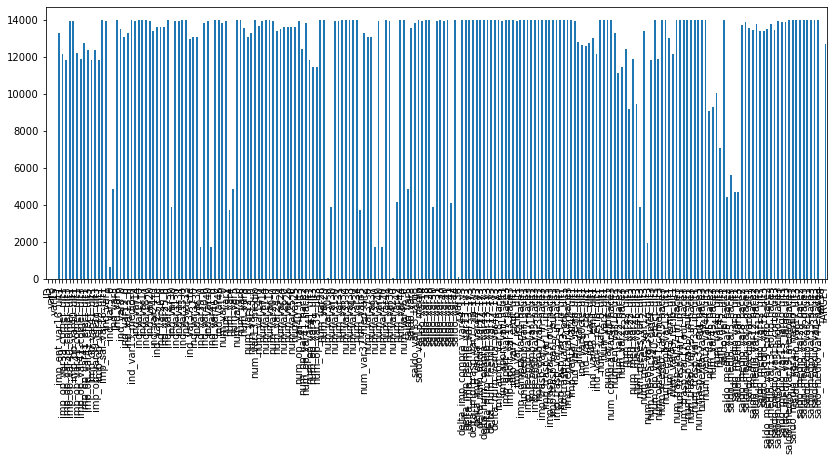

In [4]:
train_data.describe()
zero_count=(train_data == 0).astype(int).sum(axis=0)
zero_count.plot(figsize=(14,5),kind='bar')


In [5]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13999 entries, 0 to 13998
Columns: 215 entries, ID to TARGET
dtypes: float64(60), int64(155)
memory usage: 23.0 MB


In [6]:
def remove_dot_zeros_from_df(df):
    df=df.astype(object)
#     df=df.loc[:, (train_data != 0).any(axis=0)]  ### to remove columns containing all zeros
    df = train_data.loc[:, (train_data==0).mean() < .7]   #Drop columns with more than 70% zeros
    return df    

train_df=remove_dot_zeros_from_df(train_data)

In [7]:
train_df['TARGET']=train_data['TARGET']


<ipython-input-7-99747b1cec29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['TARGET']=train_data['TARGET']


In [8]:
train_df

,ID,var3,var15,ind_var5_0,ind_var5,ind_var30,ind_var39_0,ind_var41_0,num_var4,num_var5,...,num_meses_var39_vig_ult3,num_var45_hace2,num_var45_hace3,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38,TARGET
0,142882,2,55,1,1,1,1,1,3,3,...,2,0,0,0,30.00,10.65,24.27,21.63,59375.97,2807855.303
1,116073,2,26,1,1,1,1,1,1,3,...,1,0,0,0,3.00,0.00,3.00,3.00,117951.42,0.000
2,40727,2,31,1,1,1,1,1,3,3,...,2,12,45,96,230.52,38.58,682.20,317.10,81164.61,0.000
3,96753,89,55,0,0,0,1,1,1,0,...,2,6,0,6,0.00,0.00,0.00,0.00,137912.85,0.000
4,105319,2,24,1,1,1,1,1,1,3,...,1,0,0,0,3.00,0.27,3.00,2.10,40407.66,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13994,30124,2,28,1,1,1,1,1,1,3,...,2,3,3,12,30.00,16.08,30.00,25.35,197302.95,0.000
13995,77621,2,24,1,1,1,0,0,1,3,...,0,0,0,0,3.00,2.79,3.00,2.94,119817.09,0.000
13996,84866,2,23,1,1,1,1,1,1,3,...,2,0,0,0,3.00,0.63,3.00,2.22,116681.34,0.000
13997,80860,2,9,0,0,1,0,0,1,0,...,0,0,0,0,0.00,0.00,0.00,0.00,184301.91,0.000


In [9]:
print('Non_zero values\n',train_df.astype(bool).sum(axis=0),'\n')
print('Zero\n',(train_df == 0).astype(int).sum(axis=0),'\n')


Non_zero values
 ID                          13999
var3                        13986
var15                       13999
ind_var5_0                  13369
ind_var5                     9164
ind_var30                   10130
ind_var39_0                 12290
ind_var41_0                 12278
num_var4                    10279
num_var5                     9164
num_var30_0                 13946
num_var30                   10130
num_var35                   10279
num_var39_0                 12290
num_var41_0                 12278
num_var42_0                 13931
num_var42                    9853
saldo_var5                   9164
saldo_var30                 10130
saldo_var42                  9875
var36                       13921
num_var22_ult3               4820
num_med_var45_ult3           4539
num_meses_var5_ult3         10094
num_meses_var39_vig_ult3    12083
num_var45_hace2              4931
num_var45_hace3              4697
num_var45_ult3               6931
saldo_medio_var5_hace2       96

In [10]:
# from IPython.display import IFrame
# wiki=IFrame('https://en.wikipedia.org/wiki/Pearson_correlation_coefficient',width=1000,height=400)
# display(wiki)
# features_df = train_data.loc[:, (train_data==0).mean() < .7]   #Drop columns with more than 70% zeros
# features_df['TARGET']=train_df['TARGET']
# features_df=features_df.astype(object)
# features_df


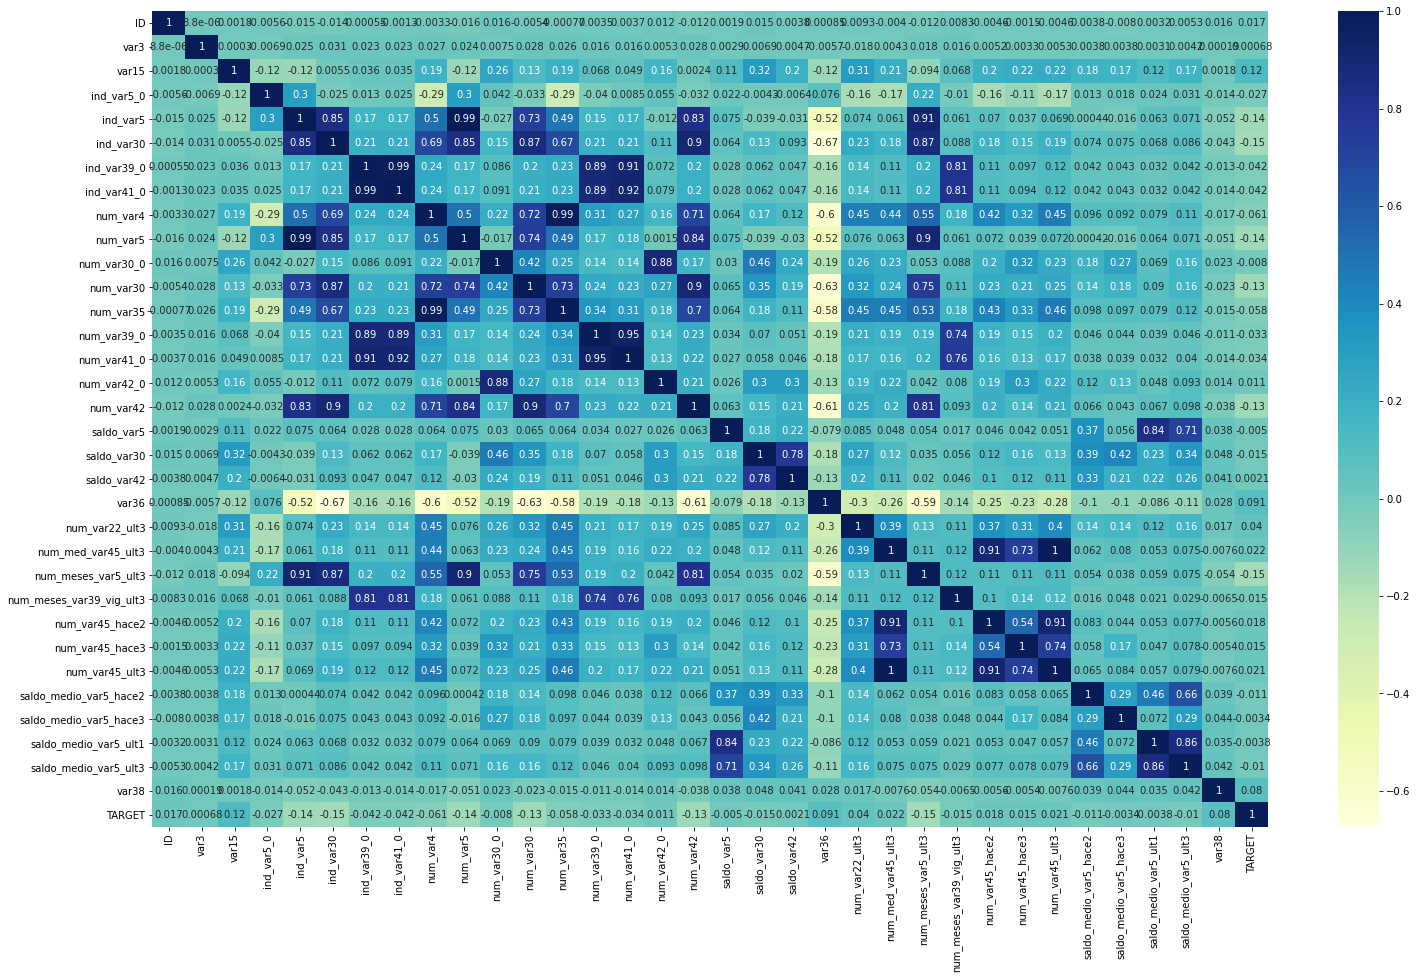

In [11]:
plt.figure(figsize=(25,15)) 
sns.heatmap(train_df.corr(), annot=True,cmap="YlGnBu")
# sns.pairplot(features_df,height=1.3)

In [12]:
X_wo_smogn=train_df.iloc[:,:-1]
y_wo_smogn=train_df.iloc[:,-1]



In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(X_wo_smogn, y_wo_smogn)


RandomForestRegressor(n_estimators=200, random_state=0)

In [19]:
intersection_columns=X_wo_smogn.columns & test_df.columns
X_test_data=test_df[intersection_columns]

# print('features_Test_samples',X_test_data.shape)

y_pred = regressor.predict(X_test_data)
regressor.score(X_wo_smogn,y_wo_smogn)

0.8631142253676648

In [21]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# mean_absolute_percentage_error(y_wo_smogn,y_pred)

In [ ]:
# print(train_df['TARGET'].value_counts())
# # tf=train_df.cumsum()
# train_df['TARGET'].plot(kind='line')
# train_df[train_df['TARGET'].min(axis=0) > 0.03].loc[:, COL_HOME].min(axis=1)


### Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise(SMOGN)
A Python implementation of Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise (SMOGN). Conducts the Synthetic Minority Over-Sampling Technique for Regression (SMOTER) with traditional interpolation, as well as with the introduction of Gaussian Noise (SMOTER-GN). Selects between the two over-sampling techniques by the KNN distances underlying a given observation. If the distance is close enough, SMOTER is applied. If too far away, SMOTER-GN is applied. Useful for prediction problems where regression is applicable, but the values in the interest of predicting are rare or uncommon. This can also serve as a useful alternative to log transforming a skewed response variable, especially if generating synthetic data is also of interest.

In [22]:
rg_mtrx_1 = [
    [4000000,  1, 0],  ## over-sample ("minority")
    [8000000, 0, 0],  ## under-sample ("majority")
    [1200000, 0, 0],  ## under-sample
    [2500000, 0, 0],  ## under-sample
]
train_df_smogn_1=smogn.smoter(train_df,y='TARGET',k=7,samp_method='balance',pert=0.04,rel_thres = 0.10,rel_method = 'manual',rel_ctrl_pts_rg = rg_mtrx_1)

r_index: 100%|###############################################################| 107/107 [00:00<00:00, 660.47it/s]


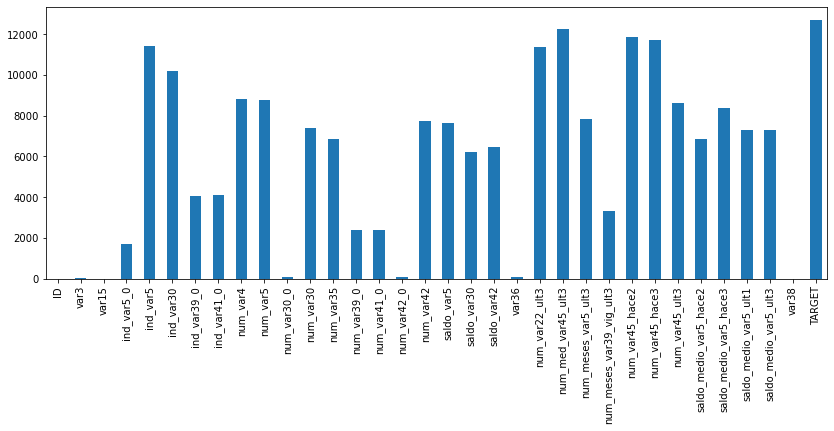

In [23]:
# print(list((train_df == 0).astype(int).sum(axis=0)))
# train_df_smogn_1=train_df_smogn_1.astype(object)
# print('Zero\n',(train_df == 0).astype(int).sum(axis=0),'\n')
# print('Zero\n',(train_df_smogn_1 == 0).astype(int).sum(axis=0),'\n')

zero_count=(train_df == 0).astype(int).sum(axis=0)
zero_count.plot(figsize=(14,5),kind='bar')
zero_cnt=(train_df_smogn_1 == 0).astype(int).sum(axis=0)
zero_cnt.plot(figsize=(14,5),kind='bar')


In [24]:
# train_df_masked=train_df.mask(train_df==0).fillna(train_df.median())
# train_df_masked.head()
train_df_smogn_1.shape

(19745, 34)

In [25]:
X=train_df_smogn_1.iloc[:,:-1]
y=train_df_smogn_1.iloc[:,-1]


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(X, y)
regressor.score(X,y)

RandomForestRegressor(n_estimators=200, random_state=0)

In [28]:
# Predicting a new result
y_pred = regressor.predict(X_test_data)
print('Predicted_score',y_pred.shape)



Predicted_score (5806,)


0.9876991911552978

In [ ]:

# !pip install sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)
# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
regressor = RandomForestRegressor(n_estimators = 200)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
regressor.score(X_train,y_train)

In [ ]:
predicted_values=regressor.predict(X_test_data)
predicted_values

In [ ]:
# test_df['Predicted_Amount']=predicted_values

In [ ]:
# test_df.to_csv('../Datasets/Predicted_amount.csv')